In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#clustering on all dataset
df = pd.read_csv(r'C:\Users\Wiktoria\Desktop\Python Basics\Projekt3_Klasteryzacja\data.csv')

In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
pd.set_option('display.max_columns', None)
desc = df.describe()

In [8]:
desc

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#target
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
#B - benign (non-cancerous), M - malignant (cancerous)

In [11]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [12]:
#high correlations between _mean and _se and _worst values
#no information on how the standard error values _se for individual
#characteristics were calculated
df = df.drop(columns=['id','radius_se', 'radius_worst', 'texture_se', 'texture_worst',
                      'perimeter_se', 'perimeter_worst', 'area_se', 'area_worst',
                      'smoothness_se', 'smoothness_worst', 'compactness_se',
                      'compactness_worst', 'concavity_se', 'concavity_worst',
                      'concave_points_se', 'concave_points_worst', 'symmetry_se',
                      'symmetry_worst', 'fractal_dimension_se',
                      'fractal_dimension_worst'])

C:\Users\Wiktoria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


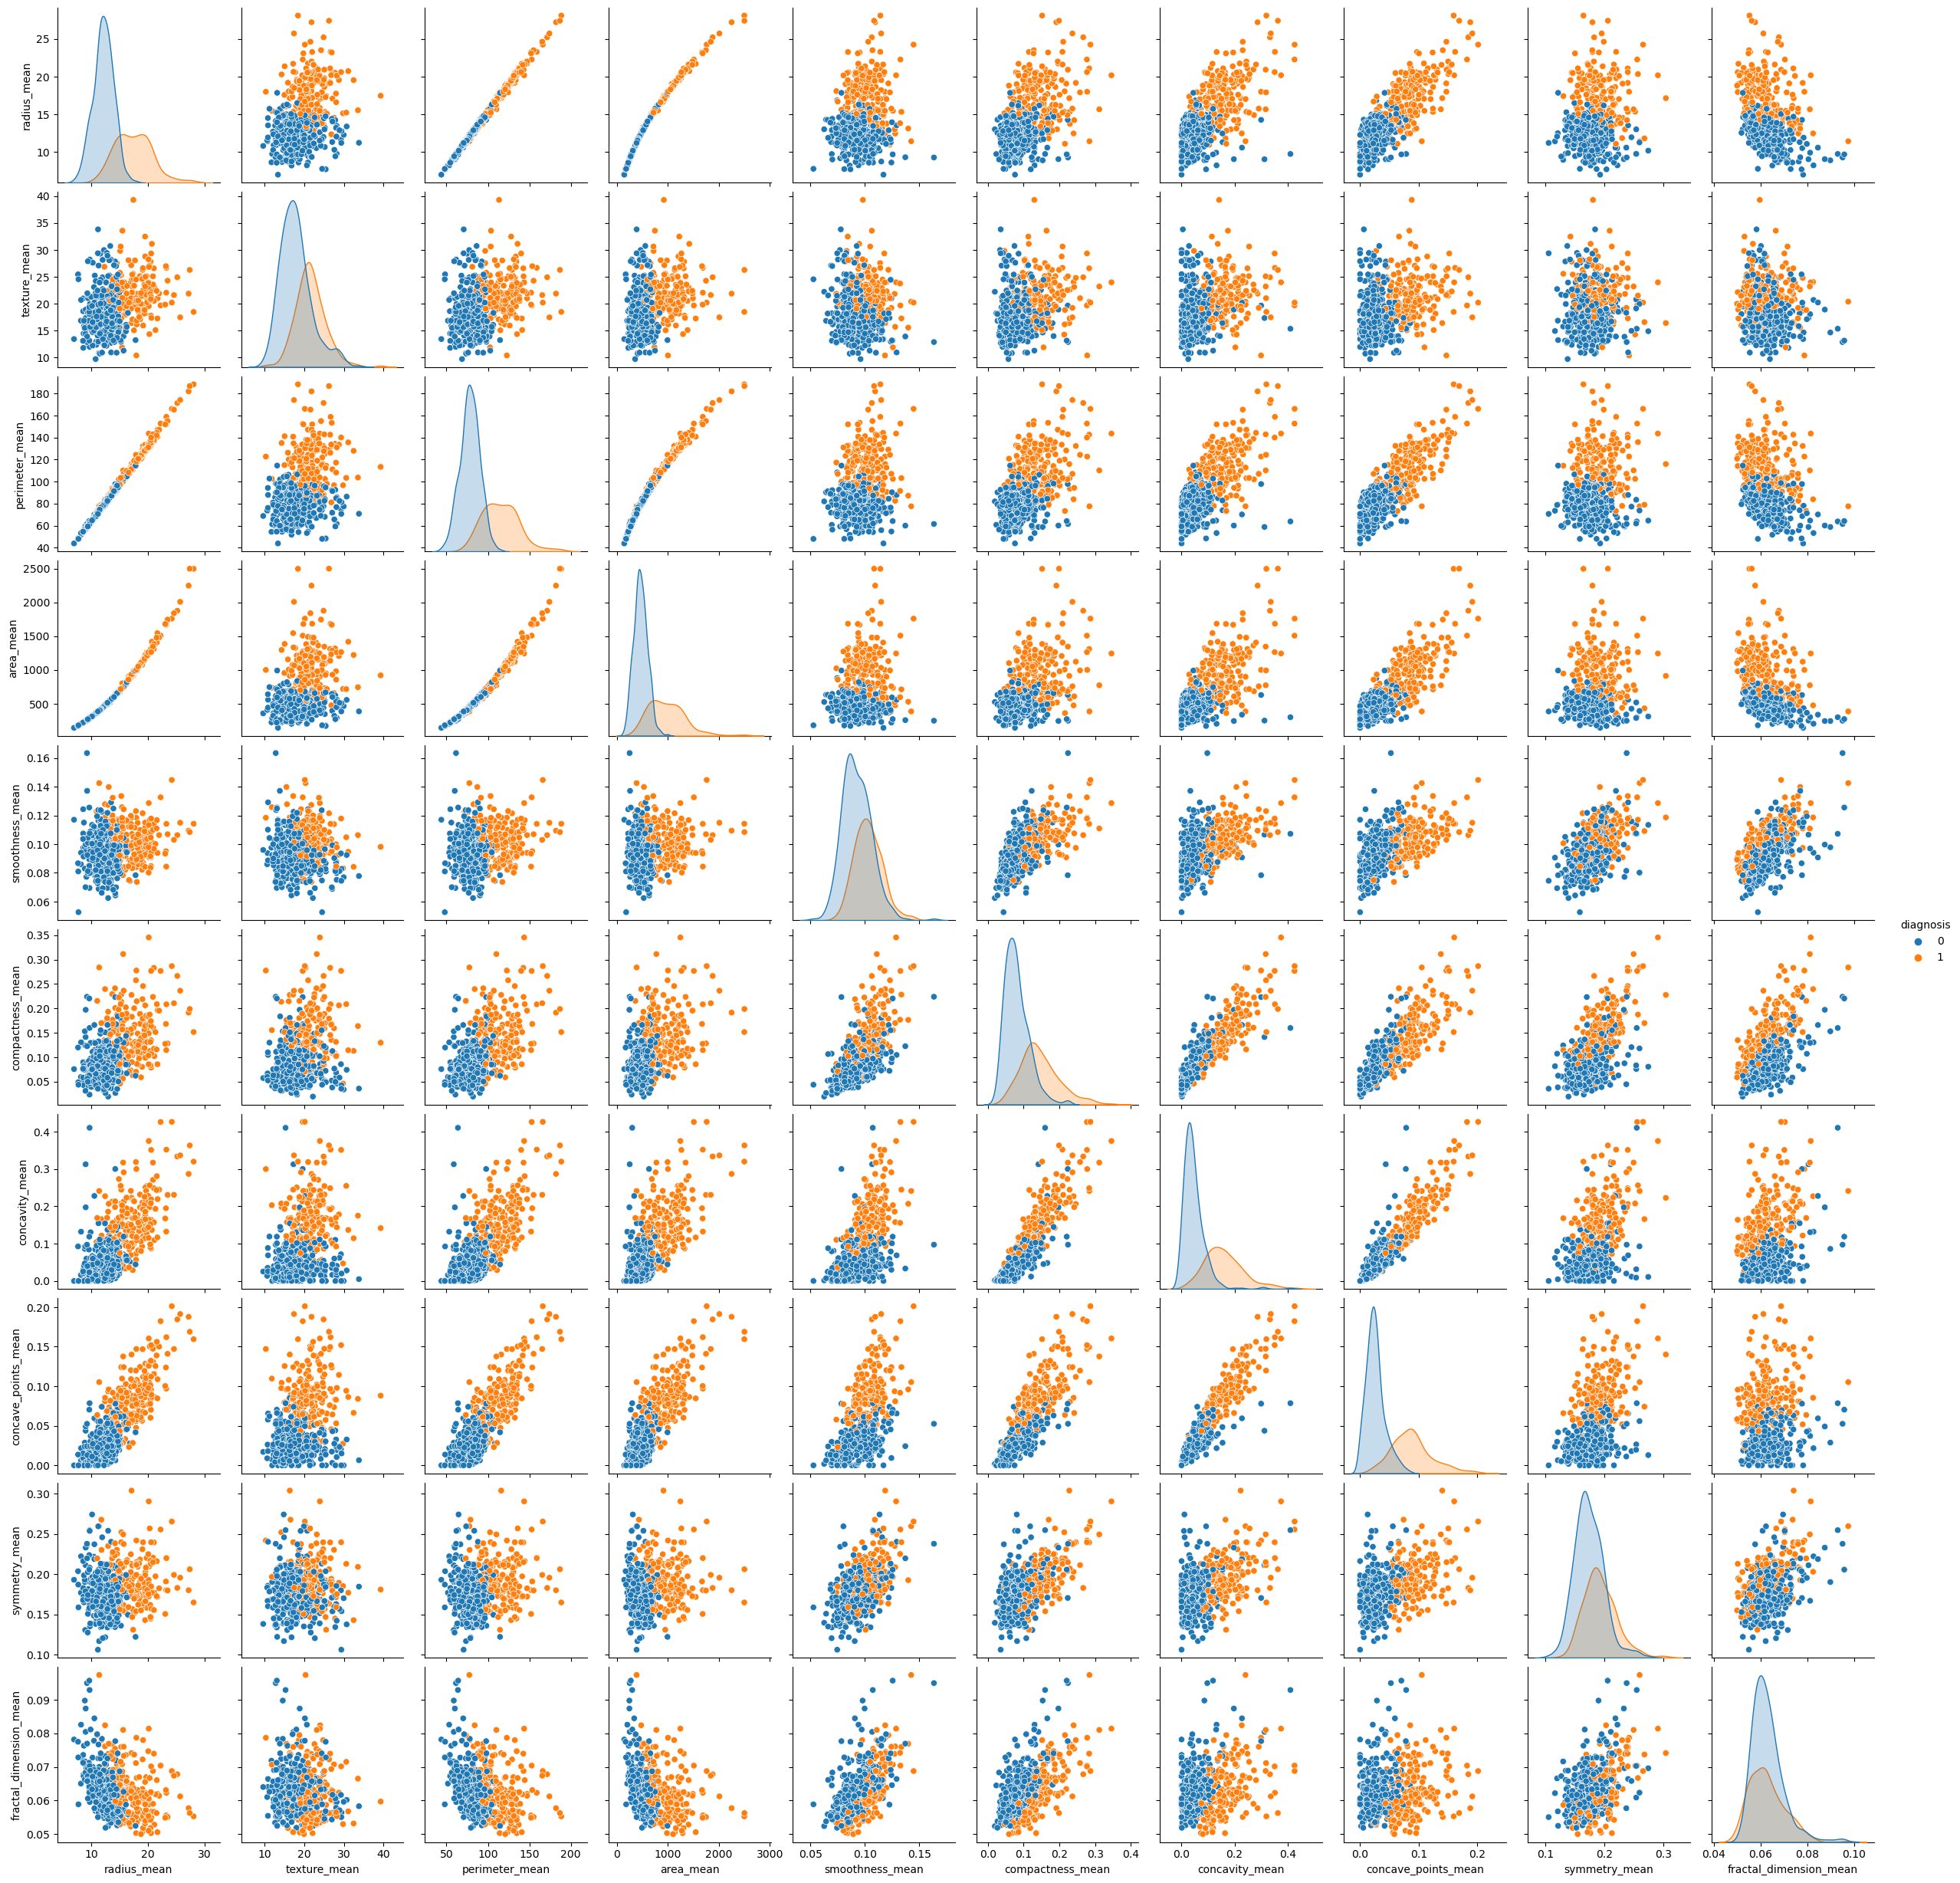

In [13]:
sns.pairplot(df, hue='diagnosis')

In [14]:
#correlation
corr = df.corr()

<Axes: >

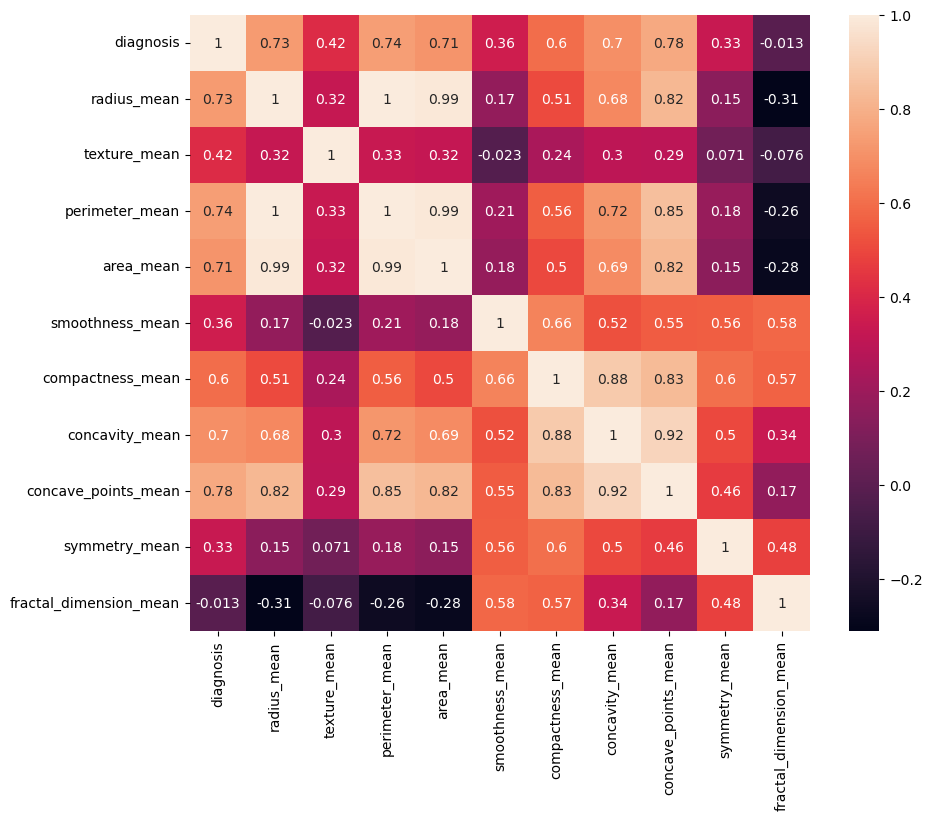

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [16]:
df = df.drop(columns=['area_mean', 'perimeter_mean', 'concavity_mean'])

In [17]:
#KMeans clustering
#reject of the target
X = df.drop(columns=['diagnosis'])

In [18]:
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.13890,0.1726,0.05623
565,20.13,28.25,0.09780,0.10340,0.09791,0.1752,0.05533
566,16.60,28.08,0.08455,0.10230,0.05302,0.1590,0.05648
567,20.60,29.33,0.11780,0.27700,0.15200,0.2397,0.07016


In [19]:
Y = df['diagnosis']

In [20]:
#scaling
scaler = MinMaxScaler()

In [21]:
X_clusters = scaler.fit_transform(X)

In [22]:
X_clusters

array([[0.52103744, 0.0226581 , 0.59375282, ..., 0.73111332, 0.68636364,
        0.60551811],
       [0.64314449, 0.27257355, 0.28987993, ..., 0.34875746, 0.37979798,
        0.14132266],
       [0.60149557, 0.3902604 , 0.51430893, ..., 0.63568588, 0.50959596,
        0.21124684],
       ...,
       [0.45525108, 0.62123774, 0.28816467, ..., 0.26351889, 0.26767677,
        0.13732098],
       [0.64456434, 0.66351031, 0.58833619, ..., 0.7554672 , 0.67525253,
        0.42544229],
       [0.03686876, 0.50152181, 0.        , ..., 0.        , 0.26616162,
        0.18702612]])

In [24]:
#elbow method
sum_sqr_distances = []

clusters = 20
for no in range(1, clusters+1):
    K_mean = KMeans(n_clusters = no, n_init=10)
    K_mean.fit(X_clusters)
    sum_sqr_distances.append(K_mean.inertia_)

C:\Users\Wiktoria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Wiktoria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Wiktoria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Wiktoria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory le

In [25]:
sum_sqr_distances

[96.45365060432722,
 60.17640988987376,
 50.39564667613527,
 43.23089098532761,
 38.71631653895606,
 35.21529849514991,
 32.94448501184092,
 30.81844815186765,
 29.011348617871356,
 27.95579112238875,
 26.91270743484123,
 25.96666374947805,
 24.96662008368654,
 24.109430785724598,
 23.272719571445833,
 22.889070722467423,
 21.81614907134596,
 21.45998758674074,
 20.919939045597637,
 20.376114889963723]

Text(0, 0.5, 'Sum of squared distances')

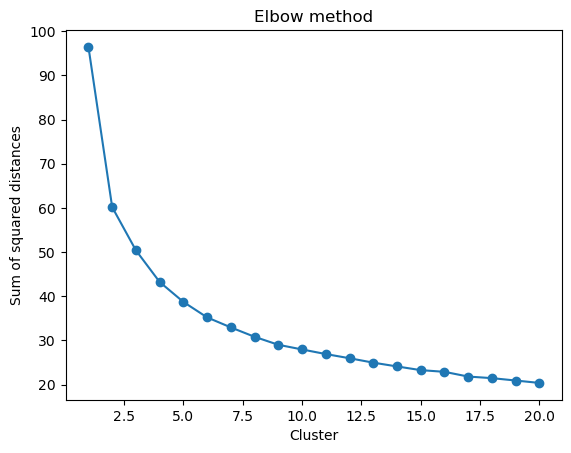

In [26]:
plt.plot(list(range(1, clusters+1)), sum_sqr_distances, '-o')
plt.title('Elbow method')
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distances')

In [28]:
#4 clusters
K_mean = KMeans(n_clusters=4, n_init=10)
K_mean.fit(X_clusters)

C:\Users\Wiktoria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

In [29]:
#clusters analysis
labels = pd.DataFrame(K_mean.labels_)
centroids = pd.DataFrame(K_mean.cluster_centers_)

In [30]:
labeledData = pd.concat((df, labels), axis=1)
labeledData = labeledData.rename({0: 'labels'}, axis=1)

In [31]:
labeledData

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,labels
0,1,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,3
1,1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0
2,1,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0
3,1,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,3
4,1,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,0
565,1,20.13,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,0
566,1,16.60,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,0
567,1,20.60,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,3


In [32]:
#content of clusters
labeledData['labels'].value_counts()

labels
1    232
2    154
0    115
3     68
Name: count, dtype: int64

In [34]:
#target in clusters
for no in range(4):
    print(f'Cluster: {no}')
    print(labeledData[labeledData['labels'] == no]['diagnosis'].value_counts())

Cluster: 0
diagnosis
1    115
Name: count, dtype: int64
Cluster: 1
diagnosis
0    212
1     20
Name: count, dtype: int64
Cluster: 2
diagnosis
0    138
1     16
Name: count, dtype: int64
Cluster: 3
diagnosis
1    61
0     7
Name: count, dtype: int64


In [40]:
#add statistics
cluster_desc = []
for no in range(4):
    print(f'Cluster: {no}')
    desc = labeledData[labeledData['labels'] == no].describe()
    cluster_desc.append(desc)
    print(desc)

Cluster: 0
       diagnosis  radius_mean  texture_mean  smoothness_mean  \
count      115.0   115.000000    115.000000       115.000000   
mean         1.0    18.892087     21.655913         0.098358   
std          0.0     2.436081      3.806854         0.009045   
min          1.0    14.190000     14.340000         0.073710   
25%          1.0    17.280000     19.115000         0.091635   
50%          1.0    18.820000     21.250000         0.098310   
75%          1.0    20.190000     23.395000         0.103950   
max          1.0    28.110000     39.280000         0.116900   

       compactness_mean  concave_points_mean  symmetry_mean  \
count        115.000000           115.000000     115.000000   
mean           0.127788             0.089197       0.183617   
std            0.030240             0.025791       0.018853   
min            0.058840             0.047440       0.130800   
25%            0.107500             0.069320       0.172650   
50%            0.128300           

In [41]:
#visualization
cols_ = labeledData.columns[1:-1]

In [42]:
cols_

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [43]:
param_ = 'mean' # std, ...

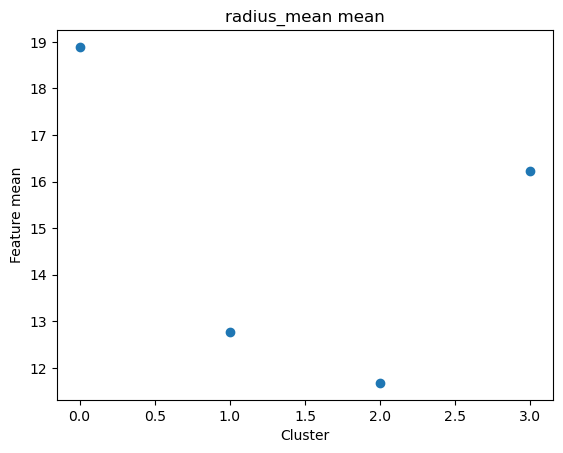

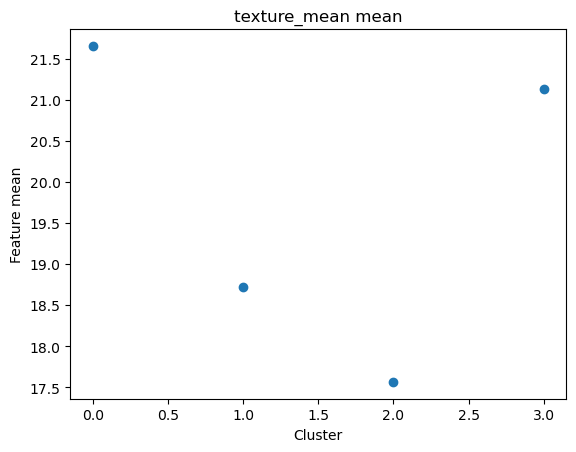

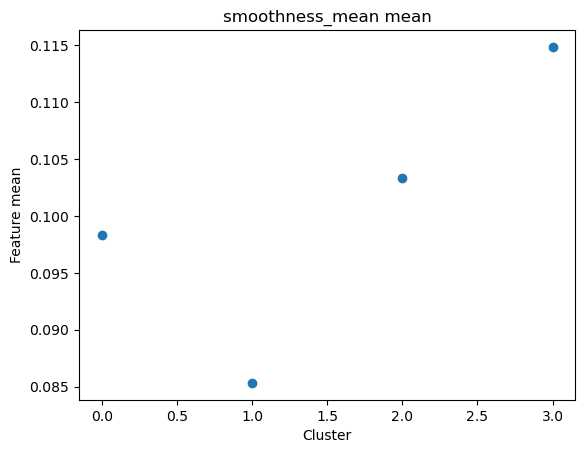

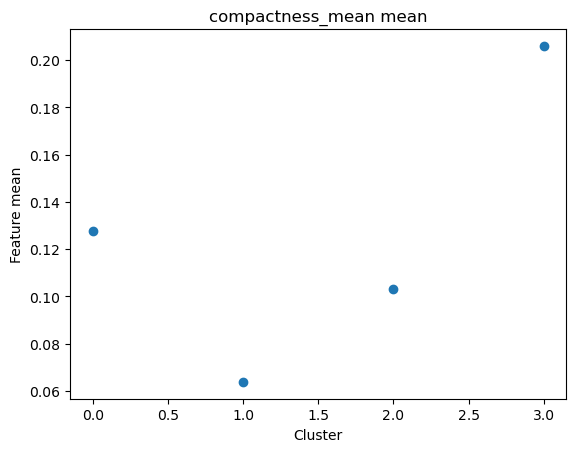

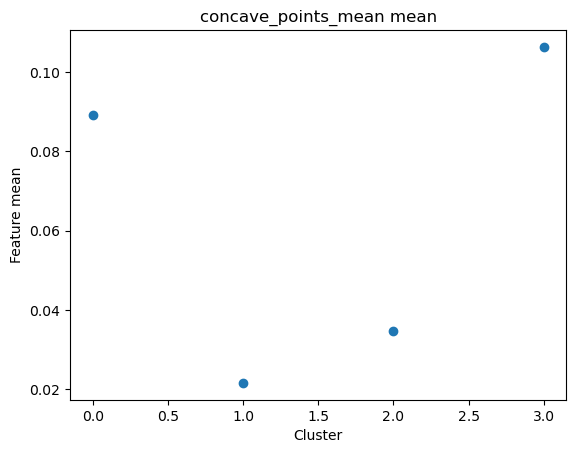

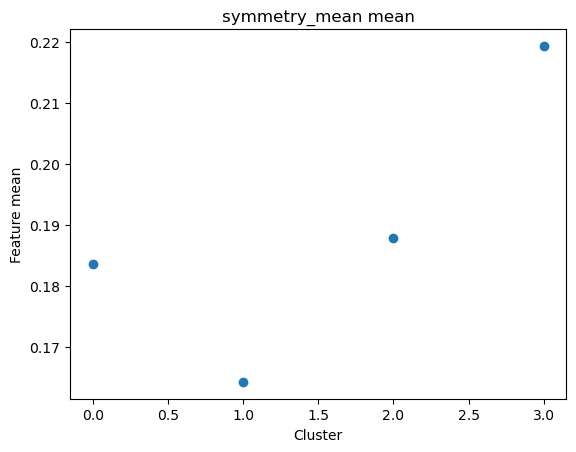

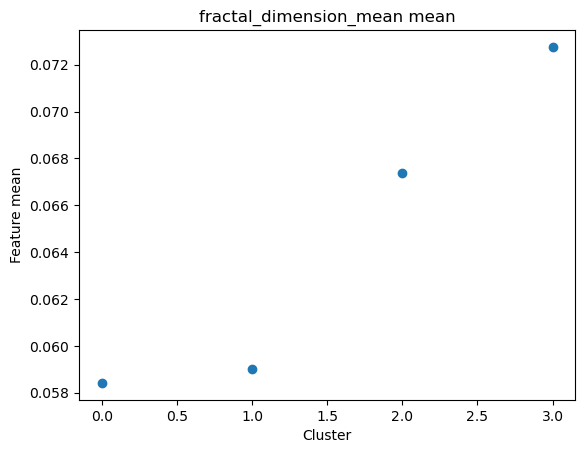

In [44]:
for col in cols_:
    plt.figure()
    values = [cluster_description[col][param_] for cluster_description in cluster_desc]
    plt.scatter(list(range(len(values))), values)
    plt.title(col + ' ' + param_)
    plt.xlabel('Cluster')
    plt.ylabel('Feature ' + param_)